# SENTIMENT ANALYSIS ON AMAZON REVIEWS

#### By Sanurhanaan Shaikh 
#### Task Assigned by Technocolabs

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading Dataset

In [2]:
df1 = pd.read_csv("data/1429_1.csv")
df2 = pd.read_csv("data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
df3 = pd.read_csv("data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df = pd.concat([df1, df2, df3])
print(len(df1), len(df2), len(df3))
print("Total Rows in dataframe:", len(df))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


34660 5000 28332
Total Rows in dataframe: 67992


In [3]:
df.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,dateAdded,dateUpdated,primaryCategories,imageURLs,manufacturerNumber,sourceURLs
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Kindle,NaN,NaN,Adapter,NaN,NaN,NaN,NaN,NaN,NaN
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,very fast,NaN,NaN,truman,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(['reviews.dateAdded', 'reviews.dateSeen','reviews.didPurchase','reviews.id','reviews.sourceURLs',
        'keys','reviews.userCity','reviews.userProvince', 'reviews.username', 'dateAdded', 'dateUpdated',
         'reviews.doRecommend', 'manufacturer', 'id', 'brand', 
        'reviews.title','primaryCategories', 'imageURLs', 'manufacturerNumber', 'sourceURLs'], axis='columns', inplace=True)

In [5]:
df.columns

Index(['name', 'asins', 'categories', 'reviews.date', 'reviews.numHelpful',
       'reviews.rating', 'reviews.text'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67992 entries, 0 to 28331
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                61232 non-null  object 
 1   asins               67990 non-null  object 
 2   categories          67992 non-null  object 
 3   reviews.date        67953 non-null  object 
 4   reviews.numHelpful  55246 non-null  float64
 5   reviews.rating      67959 non-null  float64
 6   reviews.text        67991 non-null  object 
dtypes: float64(2), object(5)
memory usage: 4.1+ MB


In [7]:
df.shape

(67992, 7)

In [8]:
df.isnull().sum()

name                   6760
asins                     2
categories                0
reviews.date             39
reviews.numHelpful    12746
reviews.rating           33
reviews.text              1
dtype: int64

## Data Cleaning

In [9]:
df['reviews.numHelpful'].fillna(0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
28327    0.0
28328    0.0
28329    0.0
28330    0.0
28331    0.0
Name: reviews.numHelpful, Length: 67992, dtype: float64

In [10]:
data=df.dropna()
data.head()

,name,asins,categories,reviews.date,reviews.numHelpful,reviews.rating,reviews.text
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,0.0,5.0,This product so far has not disappointed. My c...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,0.0,5.0,great for beginner or experienced person. Boug...
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,0.0,5.0,Inexpensive tablet for him to use and learn on...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-13T00:00:00.000Z,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2017-01-12T00:00:00.000Z,0.0,5.0,I bought this for my grand daughter when she c...


In [11]:
names = data["name"].str.split("," , n = 1, expand = True)
data["name"]= names[0]
set(data['name'])

<ipython-input-11-aff1519ab797>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["name"]= names[0]


{'All-New Fire 7 Tablet with Alexa',
 'All-New Fire HD 8 Kids Edition Tablet',
 'All-New Fire HD 8 Tablet',
 'All-New Fire HD 8 Tablet with Alexa',
 'All-New Kindle E-reader - Black',
 'All-New Kindle Oasis E-reader - 7 High-Resolution Display (300 ppi)',
 'All-new Echo (2nd Generation) with improved sound',
 'Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black',
 'Amazon - Echo Plus w/ Built-In Hub - Silver',
 'Amazon - Fire 16GB (5th Gen',
 'Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black',
 'Amazon - Kindle Voyage - 6" - 4GB - Black',
 'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping',
 'Amazon Echo Show - Black',
 'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen',
 'Amazon Echo and Fire TV Power Adapter',
 'Amazon Fire HD 8 with Al

In [12]:
categ = data["categories"].str.split("," , expand = True)

data["categories"]= categ[0]
set(data['categories'])

<ipython-input-12-d9bdcf01641d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["categories"]= categ[0]


{'Amazon Device Accessories',
 'Amazon Devices & Accessories',
 'Amazon Echo',
 'Amazon SMP',
 'Categories',
 'Chargers & Adapters',
 'Computers',
 'Computers & Accessories',
 'Computers & Tablets',
 'Computers/Tablets & Networking',
 'E-Readers & Accessories',
 'EBook Readers',
 'Electronics',
 'Electronics Features',
 'Featured Brands',
 'Fire Tablets',
 'Kindle E-readers',
 'Kindle Store',
 'Office',
 'Stereos',
 'Tablet & eBook Reader Accs',
 'Tablets',
 'Walmart for Business',
 'eBook Readers',
 'mazon.co.uk'}

In [13]:
data.shape

(48550, 7)

In [14]:
data["reviews.rating"].unique()

array([5., 4., 2., 1., 3.])

In [15]:
print("\nTotal number of unique asins: ", len(list(set(df['asins']))))


Total number of unique asins:  95


## Exploratory Data Analysis (EDA)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48550 entries, 0 to 28331
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                48550 non-null  object 
 1   asins               48550 non-null  object 
 2   categories          48550 non-null  object 
 3   reviews.date        48550 non-null  object 
 4   reviews.numHelpful  48550 non-null  float64
 5   reviews.rating      48550 non-null  float64
 6   reviews.text        48550 non-null  object 
dtypes: float64(2), object(5)
memory usage: 3.0+ MB


In [17]:
print("\nTotal number of reviews: ",len(data))
print("\nTotal number of asins: ", len(list(set(data['asins']))))
print("\nTotal number of unique products: ", len(list(set(data['name']))))
print("\nTotal number of unique categories: ", len(list(set(data['categories']))))


Total number of reviews:  48550

Total number of asins:  58

Total number of unique products:  63

Total number of unique categories:  25


In [18]:
data.shape

(48550, 7)

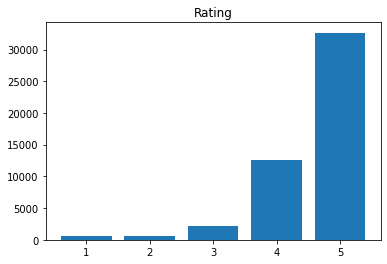

In [19]:
counts = data['reviews.rating'].value_counts()
plt.bar(counts.index, counts.values)
plt.title("Rating")
plt.show()

In [20]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B01AHB9CYG',
       'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2', 'B018Y229OU',
       'B00REQKWGA', 'B00IOYAM4I', 'B018T075DC', 'B018Y225IA',
       'B005PB2T2Q', 'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B010CEHQTG', 'B01J24C0TI', 'B01N32NCPM',
       'B06XB29FPF', 'B00QFQRELG', 'B017JG41PC', 'B01AHBBG04',
       'B01AHBDCKQ', 'B01BH83OOM', 'B0189XYY0Q', 'B01ACEKAJY',
       'B018Y224PY', 'B073SQYXTW', 'B00ZV9RDKK', 'B006GWO7UA',
       'B00BGIQS1A', 'B0751RGYJV', 'B0752151W6', 'B018SZT3BK,B01AHB9CN2',
       'B018Y226XO', 'B01IO618J8', 'B0189XZRTI,B0189XYY0Q,B0189XZ0KY',
       'B01J94SWWU', 'B06VTJWRJW', 'B01J94SCAM', 'B01J94SBEY',
       'B01J94YIT6', 'B01J94T1Z2', 'B00ZS0G0PG', 'B06XD5YCKX',
       'B06XCWLL12', 'B005OOKNP4', 'B001NIZB5M'], dtype=object)

In [21]:
pd.crosstab(data['name'], data['reviews.rating'])

reviews.rating,1.0,2.0,3.0,4.0,5.0
name,,,,,
All-New Fire 7 Tablet with Alexa,1,1,2,23,55
All-New Fire HD 8 Kids Edition Tablet,7,8,21,97,393
All-New Fire HD 8 Tablet,81,57,219,1906,4561
All-New Fire HD 8 Tablet with Alexa,10,10,47,272,704
All-New Kindle E-reader - Black,0,0,1,5,13
...,...,...,...,...,...
Kindle Paperwhite E-reader - White,1,0,0,10,19
Kindle PowerFast International Charging Kit (for accelerated charging in over 200 countries),0,0,0,1,4
Kindle Voyage E-reader,5,5,26,204,881


## Data Processing

In [22]:
sentiment = {1: 0,
            2: 0,
            3: 0,
            4: 1,
            5: 1}

data["sentiment"] = data["reviews.rating"].map(sentiment)

#print(df[df["sentiment"].isnull()])
data["sentiment"] = pd.to_numeric(data["sentiment"], errors='coerce')                                    
data = data.dropna(subset=["sentiment"])
data["sentiment"]  = data["sentiment"].astype(int)

<ipython-input-22-88be53945fca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sentiment"] = data["reviews.rating"].map(sentiment)
<ipython-input-22-88be53945fca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sentiment"] = pd.to_numeric(data["sentiment"], errors='coerce')


In [23]:
print(data.iloc[0])

name                                           All-New Fire HD 8 Tablet
asins                                                        B01AHB9CN2
categories                                                  Electronics
reviews.date                                   2017-01-13T00:00:00.000Z
reviews.numHelpful                                                  0.0
reviews.rating                                                      5.0
reviews.text          This product so far has not disappointed. My c...
sentiment                                                             1
Name: 0, dtype: object


## DataVisualization

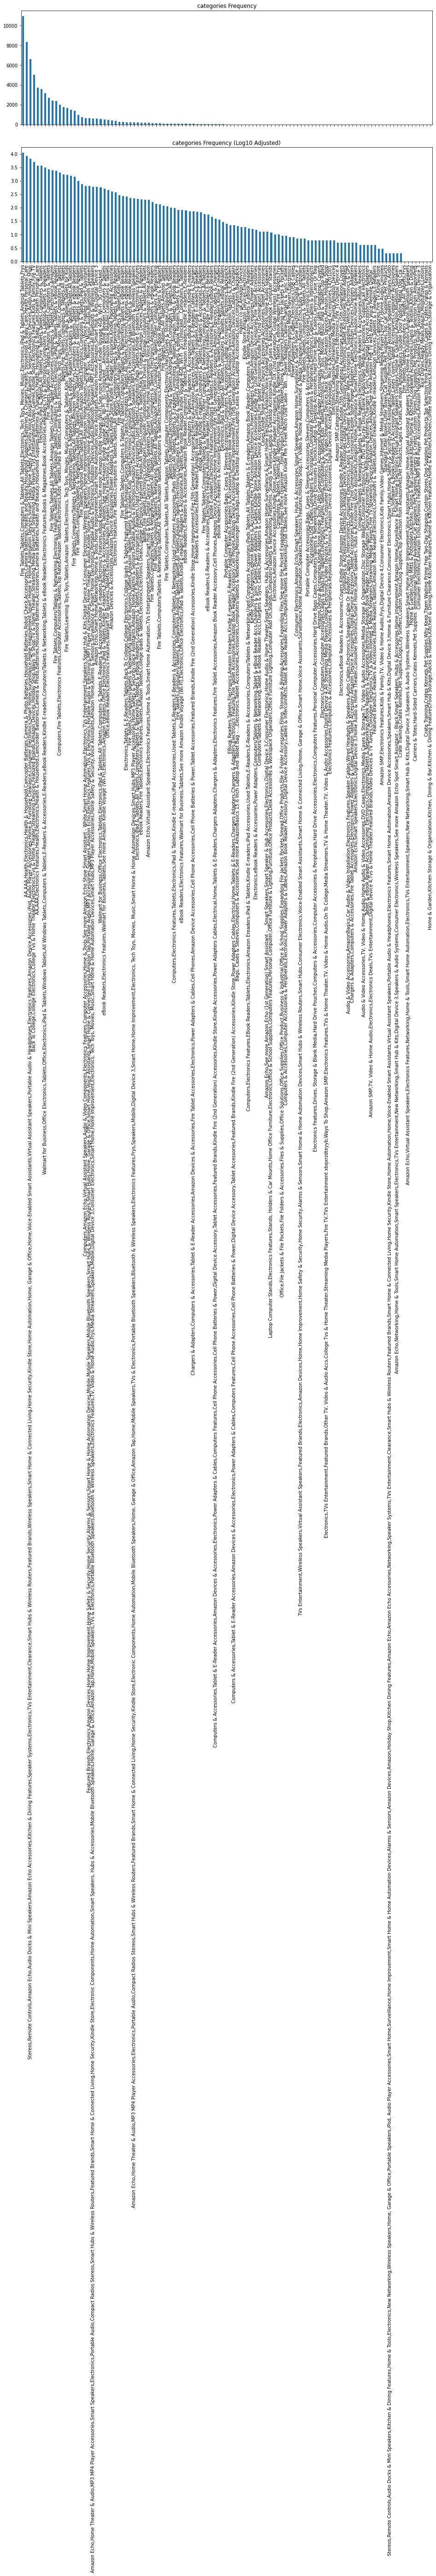

In [24]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
df["categories"].value_counts().plot(kind="bar", ax=ax1, title="categories Frequency")
np.log10(df["categories"].value_counts()).plot(kind="bar", ax=ax2, title="categories Frequency (Log10 Adjusted)") 
plt.show()

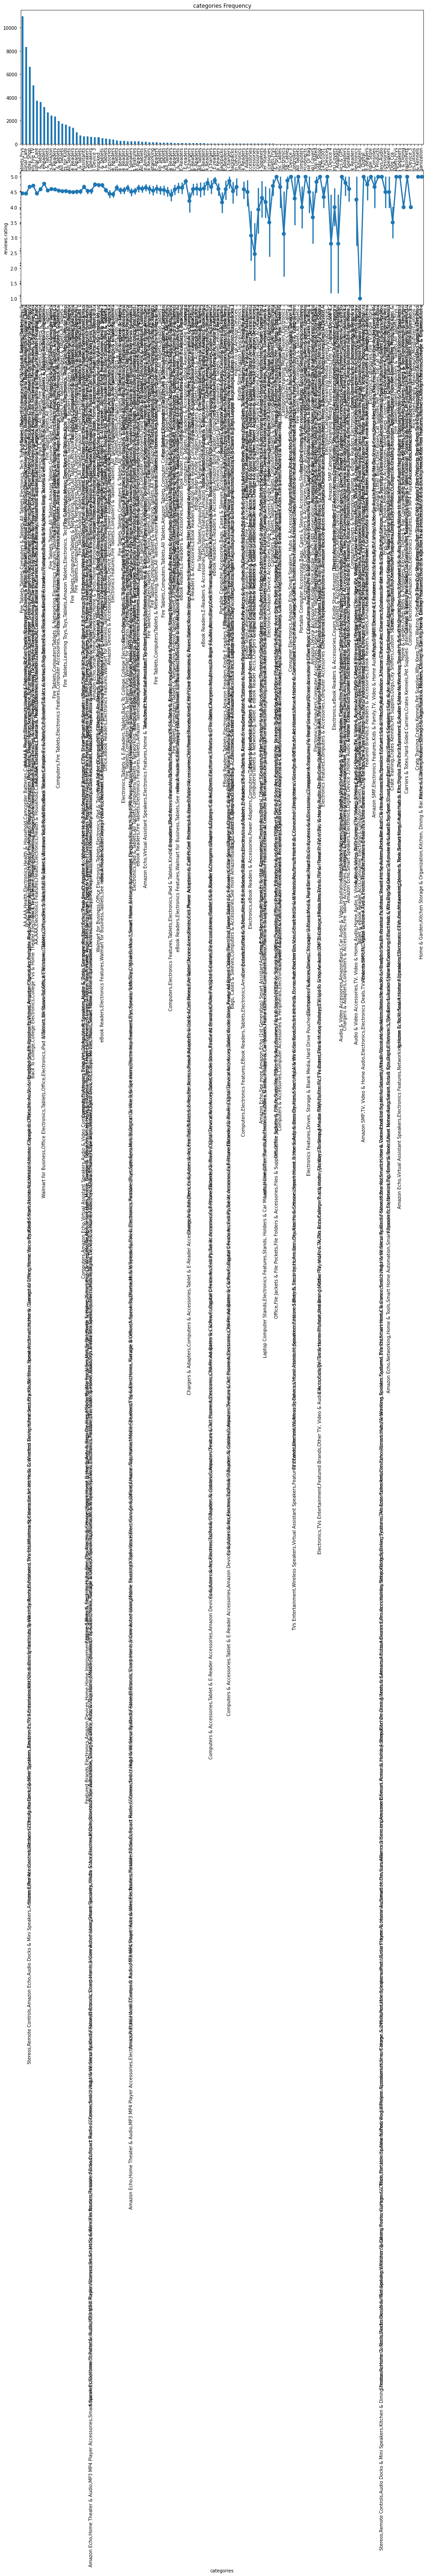

In [25]:
brand_count_ix = df["categories"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
df["categories"].value_counts().plot(kind="bar", title="categories Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="categories", y="reviews.rating", order=brand_count_ix, data=df)
plt.xticks(rotation=90)
plt.show()

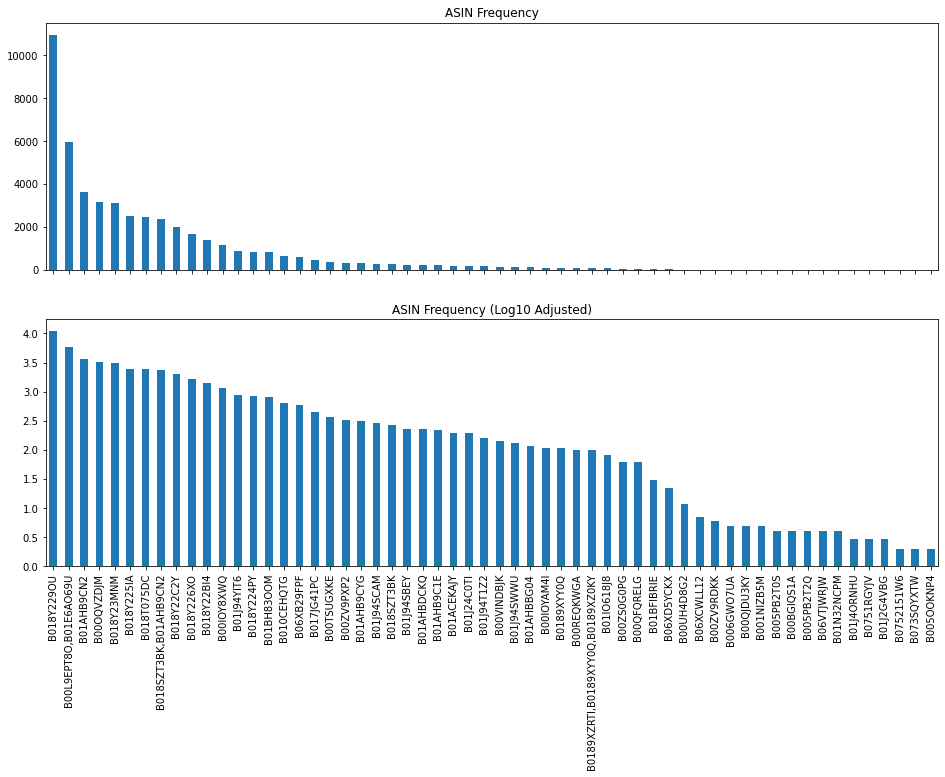

In [26]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
data["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(data["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)") 
plt.show()

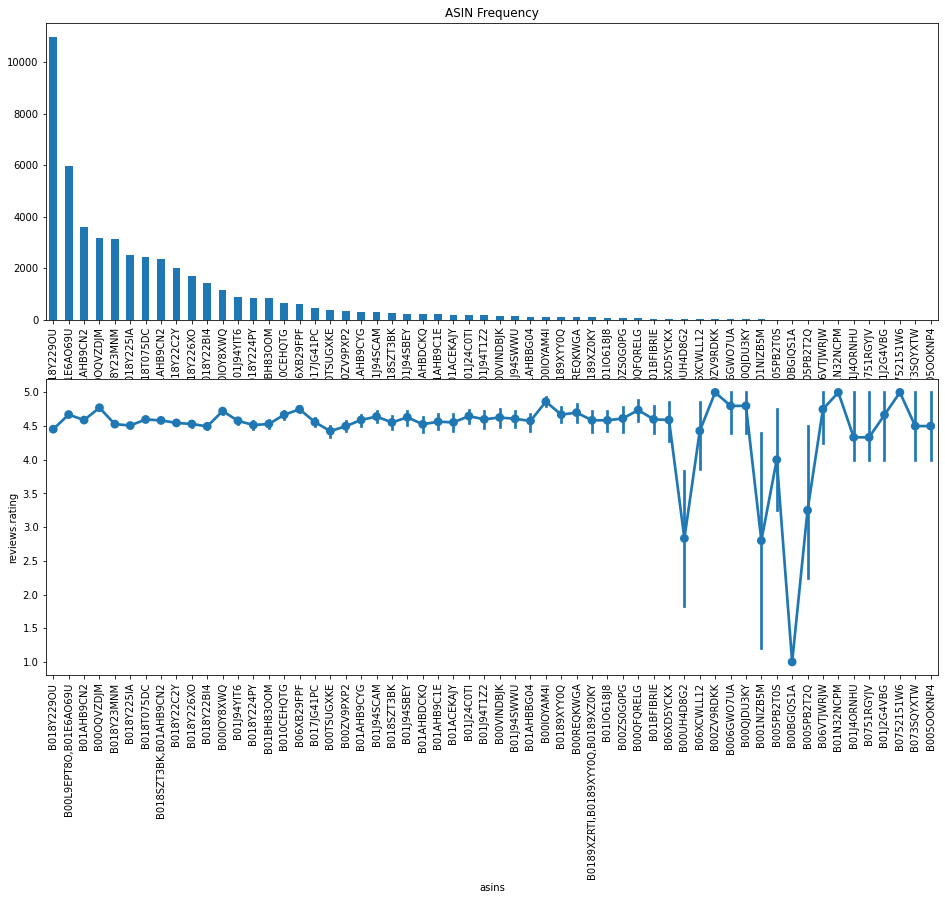

In [27]:
asins_count_ix = data["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
data["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=data)
plt.xticks(rotation=90)
plt.show()

## Saving data for Visualization 

In [28]:
data.to_csv('visualization_data.csv', index=False)

In [29]:
visual = pd.read_csv("visualization_data.csv")
visual

,name,asins,categories,reviews.date,reviews.numHelpful,reviews.rating,reviews.text,sentiment
0,All-New Fire HD 8 Tablet,B01AHB9CN2,Electronics,2017-01-13T00:00:00.000Z,0.0,5.0,This product so far has not disappointed. My c...,1
1,All-New Fire HD 8 Tablet,B01AHB9CN2,Electronics,2017-01-13T00:00:00.000Z,0.0,5.0,great for beginner or experienced person. Boug...,1
2,All-New Fire HD 8 Tablet,B01AHB9CN2,Electronics,2017-01-13T00:00:00.000Z,0.0,5.0,Inexpensive tablet for him to use and learn on...,1
3,All-New Fire HD 8 Tablet,B01AHB9CN2,Electronics,2017-01-13T00:00:00.000Z,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,1
4,All-New Fire HD 8 Tablet,B01AHB9CN2,Electronics,2017-01-12T00:00:00.000Z,0.0,5.0,I bought this for my grand daughter when she c...,1
...,...,...,...,...,...,...,...,...
48545,Fire HD 8 Tablet with Alexa,B018T075DC,Fire Tablets,2016-12-07T00:00:00.000Z,0.0,5.0,I got 2 of these for my 8 yr old twins. My 11 ...,1
48546,Fire HD 8 Tablet with Alexa,B018T075DC,Fire Tablets,2017-01-20T00:00:00.000Z,0.0,4.0,I bought this for my niece for a Christmas gif...,1
48547,Fire HD 8 Tablet with Alexa,B018T075DC,Fire Tablets,2017-01-30T00:00:00.000Z,0.0,5.0,"Very nice for light internet browsing, keeping...",1
48548,Fire HD 8 Tablet with Alexa,B018T075DC,Fire Tablets,2017-02-17T00:00:00.000Z,0.0,5.0,This Tablet does absolutely everything I want!...,1
